In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
low_memory=False
%matplotlib notebook
%matplotlib inline

In [2]:
##*ARQUIVO* - Layout caged movimentação
##Organizar os sheets do Layout CAGED
# 'extrai' aba gênero
dfLayoutGenero = pd.read_excel(r'./doc/layouts/Layout Novo Caged Movimentação.xlsx', sheet_name='sexo')
# 'extrai' ocupação
dfLayoutOcupacao = pd.read_excel(r'./doc/layouts/Layout Novo Caged Movimentação.xlsx', sheet_name='cbo2002ocupação')
# 'extrai' Nivel de escolaridade
dfLayoutEscolaridade = pd.read_excel(r'./doc/layouts/Layout Novo Caged Movimentação.xlsx', sheet_name='graudeinstrução')
# 'extrai' Raça
dfLayoutRaca = pd.read_excel(r'./doc/layouts/Layout Novo Caged Movimentação.xlsx', sheet_name='raçacor')
# extrai a planilha 'Layout'
dfLayout = pd.read_excel(r'./doc/layouts/Layout Novo Caged Movimentação.xlsx', sheet_name='Layout')
# pega layout da planilha de setor
dfLayoutSetor = pd.read_excel(r'./doc/layouts/Layout Novo Caged Movimentação.xlsx', sheet_name='seção')

In [3]:
#Verificar o dataframe do Layout CAGED
#dfLayout

In [4]:
#dfLayoutGenero

In [5]:
#dfLayoutSetor

In [6]:
#dfLayoutEscolaridade

In [7]:
dfLayoutRaca

,Código,Descrição
0,1,Branca
1,2,Preta
2,3,Parda
3,4,Amarela
4,5,Indígena
5,6,Não informada
6,9,Não Identificado


In [8]:
#dfLayoutOcupacao

In [9]:
colunas = ['graudeinstrução', 'idade', 'sexo', 'tipomovimentação', 'salário', 'raçacor', 'seção']
##*ARQUIVO DE DADOS DE MOVIMENTAÇÃO 2020* 
movimento2020 = {
    'janeiro':pd.read_csv(r'./doc/bases_de_dados/movimentacao/2020/CAGEDMOV202001.txt', delimiter=';', usecols=colunas),
    'fevereiro':pd.read_csv(r'./doc/bases_de_dados/movimentacao/2020/CAGEDMOV202002.txt', delimiter=';', usecols=colunas),
    'marco':pd.read_csv(r'./doc/bases_de_dados/movimentacao/2020/CAGEDMOV202003.txt', delimiter=';', usecols=colunas),
    'abril':pd.read_csv(r'./doc/bases_de_dados/movimentacao/2020/CAGEDMOV202004.txt', delimiter=';', usecols=colunas),
    'maio':pd.read_csv(r'./doc/bases_de_dados/movimentacao/2020/CAGEDMOV202005.txt', delimiter=';', usecols=colunas),
    'junho':pd.read_csv(r'./doc/bases_de_dados/movimentacao/2020/CAGEDMOV202006.txt', delimiter=';', usecols=colunas),
    'julho':pd.read_csv(r'./doc/bases_de_dados/movimentacao/2020/CAGEDMOV202007.txt', delimiter=';', usecols=colunas),
    'agosto':pd.read_csv(r'./doc/bases_de_dados/movimentacao/2020/CAGEDMOV202008.txt', delimiter=';', usecols=colunas),
    'setembro':pd.read_csv(r'./doc/bases_de_dados/movimentacao/2020/CAGEDMOV202009.txt', delimiter=';', usecols=colunas),
    'outubro':pd.read_csv(r'./doc/bases_de_dados/movimentacao/2020/CAGEDMOV202010.txt', delimiter=';', usecols=colunas),
    'novembro':pd.read_csv(r'./doc/bases_de_dados/movimentacao/2020/CAGEDMOV202011.txt', delimiter=';', usecols=colunas),
    'dezembro':pd.read_csv(r'./doc/bases_de_dados/movimentacao/2020/CAGEDMOV202012.txt', delimiter=';', usecols=colunas)
}

##*ARQUIVO DE DADOS DE MOVIMENTAÇÃO 2021* 
movimento2021 = {
    'janeiro':pd.read_csv(r'./doc/bases_de_dados/movimentacao/2021/CAGEDMOV202101.txt', delimiter=';', usecols=colunas),
    'fevereiro':pd.read_csv(r'./doc/bases_de_dados/movimentacao/2021/CAGEDMOV202102.txt', delimiter=';', usecols=colunas),
    'marco':pd.read_csv(r'./doc/bases_de_dados/movimentacao/2021/CAGEDMOV202103.txt', delimiter=';', usecols=colunas),
    'abril': pd.read_csv(r'./doc/bases_de_dados/movimentacao/2021/CAGEDMOV202104.txt', delimiter=';', usecols=colunas)
}

In [10]:
##*ARQUIVO DE CONTAS NACIONAIS*
contasNacionais = pd.read_excel(r'./doc/bases_de_dados/contas_nacionais/Tabela 1846.xlsx', 'Tabela')

In [11]:
#Variáveis com códigos/informações que serão utilizadas durante o projeto
meses_grafico2020 = ['Janeiro','Fevereiro','Março','Abril','Maio','Junho','Julho','Agosto','Setembro','Outubro','Novembro','Dezembro']
meses_grafico2021 = ['Janeiro','Fevereiro','Março','Abril']
cod_admitidos = [10,20,25,35,70]
cod_demitidos = [31,32,33,40,43,45,50,60,80,90,98]
sec_antigas = ['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','Z']
sec_novas = ["Agricultura, Pecuária, Produção Florestal, Pesca e Aquicultura","Indústrias Extrativas","Indústrias de Transformação","Eletricidade e Gás","Água, Esgoto, Atividades de Gestão de Resíduos e Descontaminação","Construção","Comércio, Reparação de Veículos Automotores e Motocicletas","Transporte, Armazenagem e Correio","Alojamento e Alimentação","Informação e Comunicação","Atividades Financeiras, de Seguros e Serviços Relacionados","Atividades Imobiliárias","Atividades Profissionais, Científicas e Técnicas","Atividades Administrativas e Serviços Complementares","Administração Pública, Defesa e Seguridade Social","Educação","Saúde Humana e Serviços Sociais","Artes, Cultura, Esporte e Recreação","Outras Atividades de Serviços","Serviços Domésticos","Organismos Internacionais e Outras Instituições Extraterritoriais","Não identificado"]

In [12]:
#Função para saber se a pessoa foi demitida ou contratada
def movimento(cod):
    if cod in cod_admitidos:
        return 'admitido'
    elif cod in cod_demitidos:
        return 'demitido'
    else: 
        return False

In [13]:
#Classes sociais de acordo com o IBGE
#https://www.todamateria.com.br/classe-social/
def classes_sociais(salario):
    salario_minimo = 1100
    if(salario>(salario_minimo*20)):
        return 'A'
    elif((salario>(salario_minimo*10))and(salario<=(salario_minimo*20))):
        return 'B'
    elif((salario>(salario_minimo*4))and(salario<=(salario_minimo*10))):
        return 'C'
    elif((salario>(salario_minimo*2))and(salario<=(salario_minimo*4))):
        return 'D'
    elif(salario<=(salario_minimo*2)):
        return 'E'

In [14]:
#Numeração da raça de acordo com o novo Layout dos Microdados do CAGED
def Raca(numRaca):
    if(numRaca == 1):
        return 'Branca'
    elif(numRaca == 2):
        return 'Preta'
    elif(numRaca == 3):
        return 'Parda'
    elif(numRaca == 4):
        return 'Amarela'
    elif(numRaca == 5):
        return 'Indígena'
    elif(numRaca == 6):
        return 'Não informada'
    elif(numRaca == 9):
        return 'Não identificada'

In [15]:
def contagemEmpregoSexo(dic):
    mes = {'mulheres':{'admissoes':0,'demissoes':0,'nao_identificado':0},'homens':{'admissoes':0,'demissoes':0,'nao_identificado':0}}
    for k,v in dic.items():
        if(movimento(k[0])=='admitido'):
            if(k[1]==1):
                mes['homens']['admissoes']+=v 
            if(k[1]==3):
                mes['mulheres']['admissoes']+=v
        elif(movimento(k[0])=='demitido'):
            if(k[1]==1):
                mes['homens']['demissoes']+=v
            if(k[1]==3):
                mes['mulheres']['demissoes']+=v
        else:
            if(k[1]==1):
                mes['homens']['nao_identificado']+=v
            if(k[1]==3):
                mes['mulheres']['nao_identificado']+=v
    return mes

def contagemEmpregoClasseSocial(lista): 
    demitidos = {'A':0,'B':0,'C':0,'D':0,'E':0}
    admitidos = {'A':0,'B':0,'C':0,'D':0,'E':0}
    nao_identificado = {'A':0,'B':0,'C':0,'D':0,'E':0}
    for l in lista:
        if movimento(l['tipomovimentação'])=='admitido':
            if(classes_sociais(l['salário'])=='A'):
                admitidos['A']+=1
            elif(classes_sociais(l['salário'])=='B'):
                admitidos['B']+=1
            elif(classes_sociais(l['salário'])=='C'):
                admitidos['C']+=1
            elif(classes_sociais(l['salário'])=='D'):
                admitidos['D']+=1
            else:
                admitidos['E']+=1
        elif movimento(l['tipomovimentação'])=='demitido':
            if(classes_sociais(l['salário'])=='A'):
                demitidos['A']+=1
            elif(classes_sociais(l['salário'])=='B'):
                demitidos['B']+=1
            elif(classes_sociais(l['salário'])=='C'):
                demitidos['C']+=1
            elif(classes_sociais(l['salário'])=='D'):
                demitidos['D']+=1
            else:
                demitidos['E']+=1
        else:
            if(classes_sociais(l['salário'])=='A'):
                nao_identificado['A']+=1
            elif(classes_sociais(l['salário'])=='B'):
                nao_identificado['B']+=1
            elif(classes_sociais(l['salário'])=='C'):
                nao_identificado['C']+=1
            elif(classes_sociais(l['salário'])=='D'):
                nao_identificado['D']+=1
            else:
                nao_identificado['E']+=1
        
    return {
        'admitidos':admitidos,
        'demitidos':demitidos,
        'nao_identificado':nao_identificado
    }

In [16]:
# pessoas admitidas/demitidas por faixa etária
# fonte para dividir a faixa etária: https://educador.brasilescola.uol.com.br/estrategias-ensino/faixa-etaria-populacao-brasileira.htm
## jovens: idade <= 19
## adultos: idade >= 20 e <= 59
## idosos: idade >= 60

def contagemPorFaixaEtaria (lista):
    demitidos = {'Jovens':0,'Adultos':0,'Idosos':0}
    admitidos = {'Jovens':0,'Adultos':0,'Idosos':0}
    
    for l in lista:
        
        idadeIndividuo = int(l['idade'])
        movimentacao = movimento(l['tipomovimentação'])
        
        if idadeIndividuo <= 19:
            if movimentacao =='admitido':
                admitidos['Jovens'] += 1
            elif movimentacao == 'demitido':
                demitidos['Jovens'] += 1
                
        elif idadeIndividuo >= 20 and idadeIndividuo <= 59:
            if movimentacao == 'admitido':
                admitidos['Adultos'] += 1
            elif movimentacao == 'demitido':
                demitidos['Adultos'] += 1
                
        elif idadeIndividuo >= 60:
            if movimentacao == 'admitido':
                admitidos['Idosos'] += 1
            elif movimentacao == 'demitido':
                demitidos['Idosos'] += 1
                
    return {
        'admitidos': admitidos,
        'demitidos': demitidos
    }

In [17]:
#função para renderizar o gráfico de emprego de acordo com gênero
def plotGraficoEmpregoGenero(mulheres,homens,label_homens,label_mulheres,xlabel,ylabel,title,tamanhox,tamanhoy,meses):
    barWidth = 0.25
    plt.figure(figsize=(tamanhox,tamanhoy))
    r1 = np.arange(len(mulheres))
    r2 = [x + barWidth for x in r1]
    plt.bar(r1,mulheres,color='#6A5ACD',width=barWidth,label=label_mulheres)
    plt.bar(r2,homens,color='#649AED',width=barWidth,label=label_homens)
    plt.xlabel(xlabel)
    plt.xticks([r + barWidth for r in range(len(mulheres))],meses)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.legend()
    plt.show()

In [18]:
##Verificar o dataframe do CAGED Movimentação 

#Admissões e demissões por gênero 2020
empregoPorGenero2020 = {}
for mes in movimento2020:
    empregoPorGenero2020[mes]=contagemEmpregoSexo(movimento2020[mes].sample(50).groupby(['tipomovimentação'])['sexo'].value_counts().to_dict())
#Admissões e demissões por gênero 2021 
empregoPorGenero2021 = {}
for mes in movimento2021:
    empregoPorGenero2021[mes]=contagemEmpregoSexo(movimento2021[mes].sample(50).groupby(['tipomovimentação'])['sexo'].value_counts().to_dict())

In [19]:
#função para renderizar o gráfico de emprego de acordo com a classe social
def plotGraficoEmpregoClasseSocial(lista_A,lista_B,lista_C,lista_D,lista_E,ylabel,xlabel,title,tamanhox,tamanhoy,meses):

    fig, ax = plt.subplots()

    ax.plot(meses, lista_A, lw = 2, alpha = 1,label='A')
    ax.plot(meses, lista_B, lw = 2, alpha = 1,label='B')
    ax.plot(meses, lista_C, lw = 2, alpha = 1,label='C')
    ax.plot(meses, lista_D, lw = 2, alpha = 1,label='D')
    ax.plot(meses, lista_E, lw = 2, alpha = 1,label='E')
    fig.set_size_inches(tamanhox, tamanhoy)

    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.legend()
    plt.show()

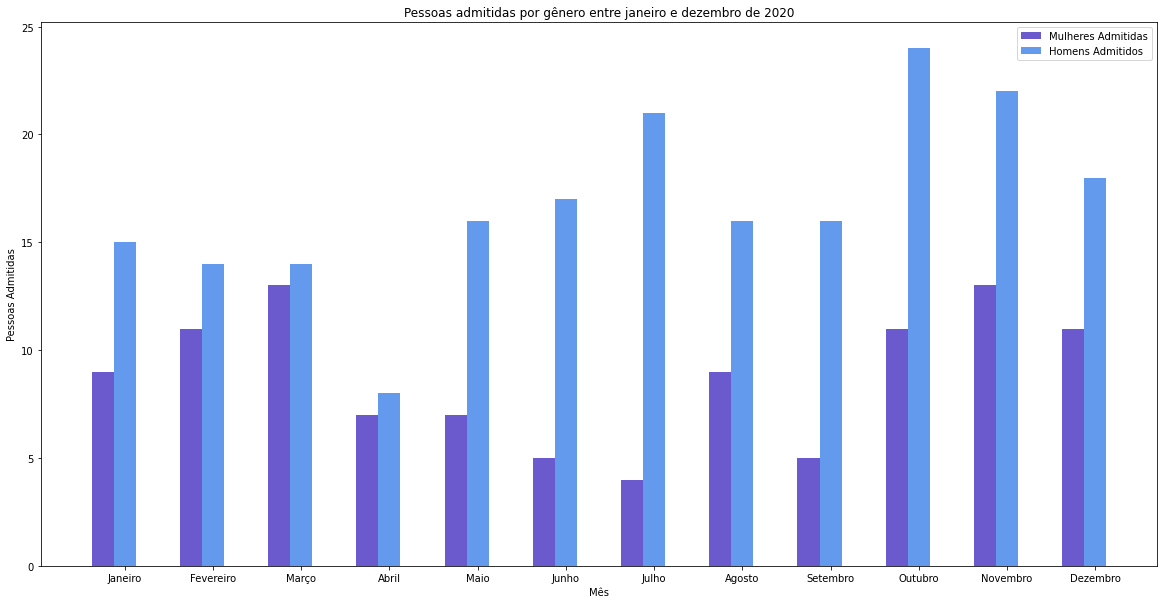

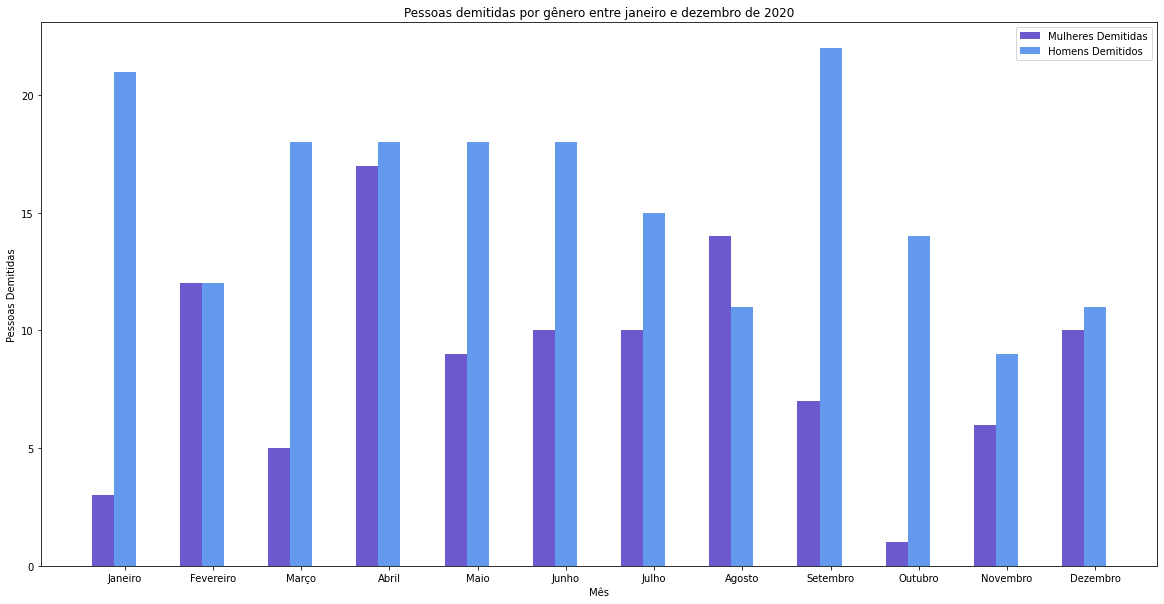

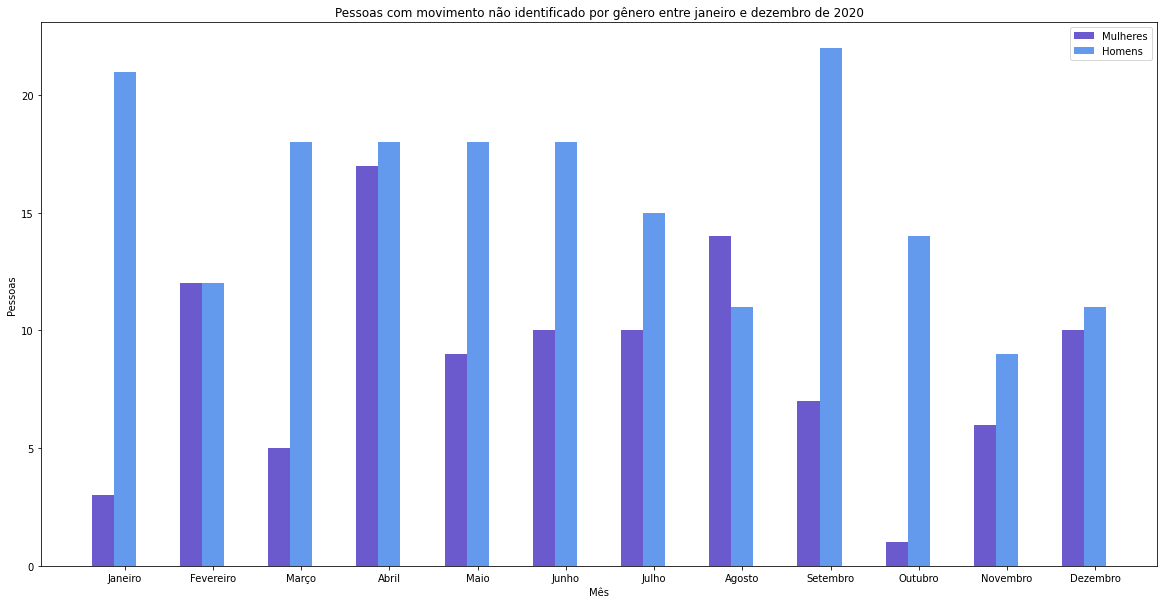

In [20]:
#Gŕaficos de Admissões e demissões por gênero 2020 
mulheres_admitidos2020 = []
mulheres_demitidos2020 = []
homens_admitidos2020 = []
homens_demitidos2020 = []
mulheres_nao_identificado2020 = []
homens_nao_identificado2020 = []

for mes,dic in empregoPorGenero2020.items():
    mulheres_admitidos2020.append(dic['mulheres']['admissoes'])
    homens_admitidos2020.append(dic['homens']['admissoes'])
    mulheres_demitidos2020.append(dic['mulheres']['demissoes'])
    homens_demitidos2020.append(dic['homens']['demissoes'])
    mulheres_nao_identificado2020.append(dic['mulheres']['nao_identificado'])
    homens_nao_identificado2020.append(dic['homens']['nao_identificado'])
plotGraficoEmpregoGenero(mulheres_admitidos2020,homens_admitidos2020,'Homens Admitidos','Mulheres Admitidas','Mês','Pessoas Admitidas','Pessoas admitidas por gênero entre janeiro e dezembro de 2020',20,10,meses_grafico2020)
plotGraficoEmpregoGenero(mulheres_demitidos2020,homens_demitidos2020,'Homens Demitidos','Mulheres Demitidas','Mês','Pessoas Demitidas','Pessoas demitidas por gênero entre janeiro e dezembro de 2020',20,10,meses_grafico2020)
plotGraficoEmpregoGenero(mulheres_demitidos2020,homens_demitidos2020,'Homens','Mulheres','Mês','Pessoas','Pessoas com movimento não identificado por gênero entre janeiro e dezembro de 2020',20,10,meses_grafico2020)



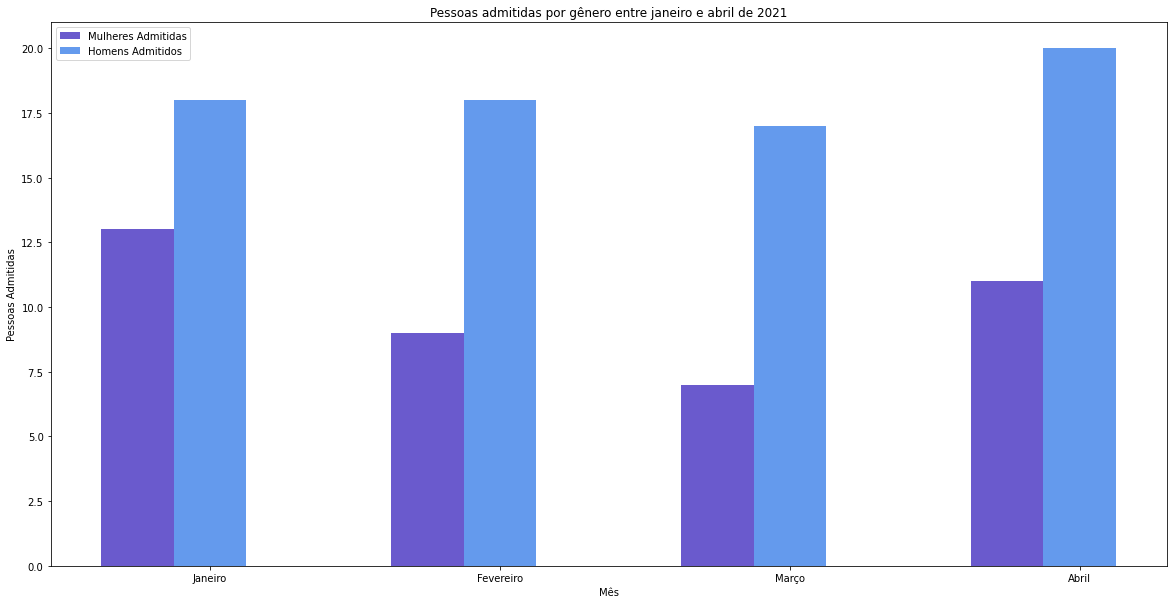

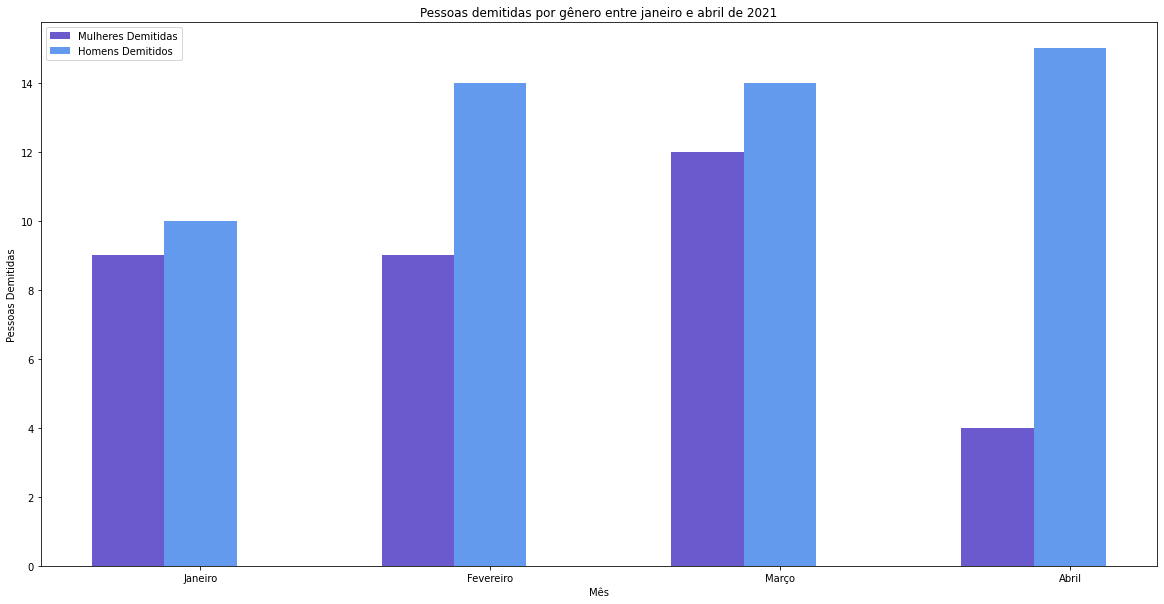

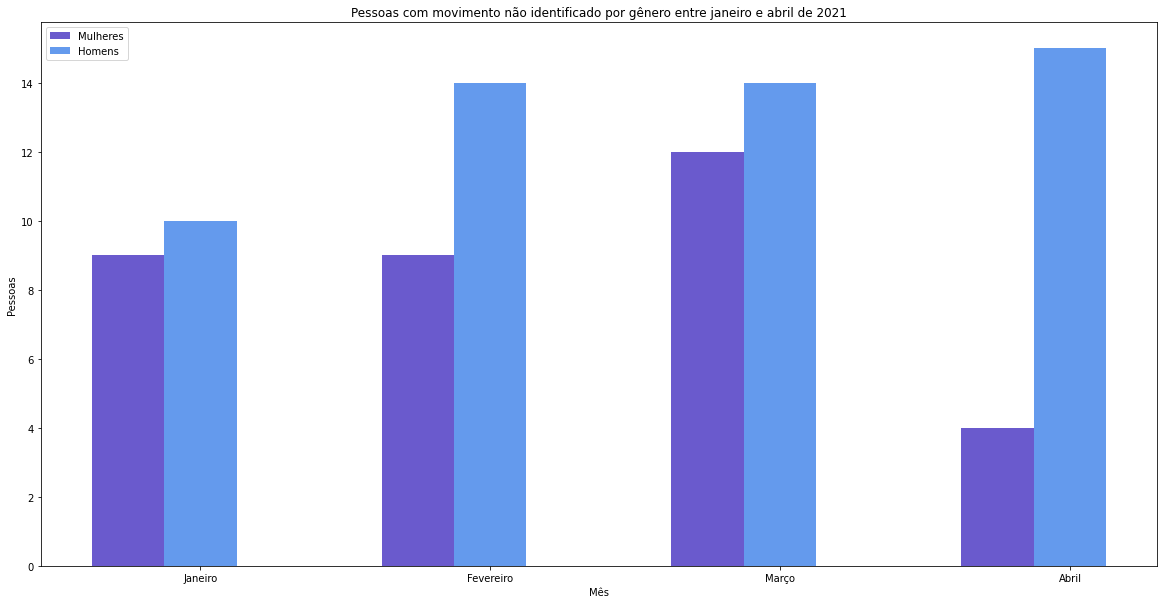

In [21]:
#Gŕaficos de Admissões e demissões por gênero 2021
mulheres_admitidos2021 = []
mulheres_demitidos2021 = []
homens_admitidos2021 = []
homens_demitidos2021 = []
mulheres_nao_identificado2021 = []
homens_nao_identificado2021 = []

for mes,dic in empregoPorGenero2021.items():
    mulheres_admitidos2021.append(dic['mulheres']['admissoes'])
    homens_admitidos2021.append(dic['homens']['admissoes'])
    mulheres_demitidos2021.append(dic['mulheres']['demissoes'])
    homens_demitidos2021.append(dic['homens']['demissoes'])
    mulheres_nao_identificado2021.append(dic['mulheres']['nao_identificado'])
    homens_nao_identificado2021.append(dic['homens']['nao_identificado'])
plotGraficoEmpregoGenero(mulheres_admitidos2021,homens_admitidos2021,'Homens Admitidos','Mulheres Admitidas','Mês','Pessoas Admitidas','Pessoas admitidas por gênero entre janeiro e abril de 2021',20,10,meses_grafico2021)
plotGraficoEmpregoGenero(mulheres_demitidos2021,homens_demitidos2021,'Homens Demitidos','Mulheres Demitidas','Mês','Pessoas Demitidas','Pessoas demitidas por gênero entre janeiro e abril de 2021',20,10,meses_grafico2021)
plotGraficoEmpregoGenero(mulheres_demitidos2021,homens_demitidos2021,'Homens','Mulheres','Mês','Pessoas','Pessoas com movimento não identificado por gênero entre janeiro e abril de 2021',20,10,meses_grafico2021)

In [22]:
#função para renderizar o gráfico de emprego de acordo com a classe social
def plotGraficoEmpregoFaixaEtaria(lista_Jovens,lista_Adultos,lista_Idosos,ylabel,xlabel,title,tamanhox,tamanhoy,meses):

    fig, ax = plt.subplots()

    ax.plot(meses, lista_Jovens, lw = 2, alpha = 1,label='Jovens')
    ax.plot(meses, lista_Adultos, lw = 2, alpha = 1,label='Adultos')
    ax.plot(meses, lista_Idosos, lw = 2, alpha = 1,label='Idosos')
    
    fig.set_size_inches(tamanhox, tamanhoy)

    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.legend()
    plt.show()

In [23]:
#Admissões e demissões por classe social 2020 
empregoPorClasseSocial2020 = {}
for mes in movimento2020:
    empregoPorClasseSocial2020[mes]=contagemEmpregoClasseSocial(movimento2020[mes][['tipomovimentação','salário']].sample(50).to_dict('records'))

#Admissões e demissões por classe social 2021
empregoPorClasseSocial2021 = {} 
for mes in movimento2021:
    empregoPorClasseSocial2021[mes]=contagemEmpregoClasseSocial(movimento2021[mes][['tipomovimentação','salário']].sample(50).to_dict('records'))

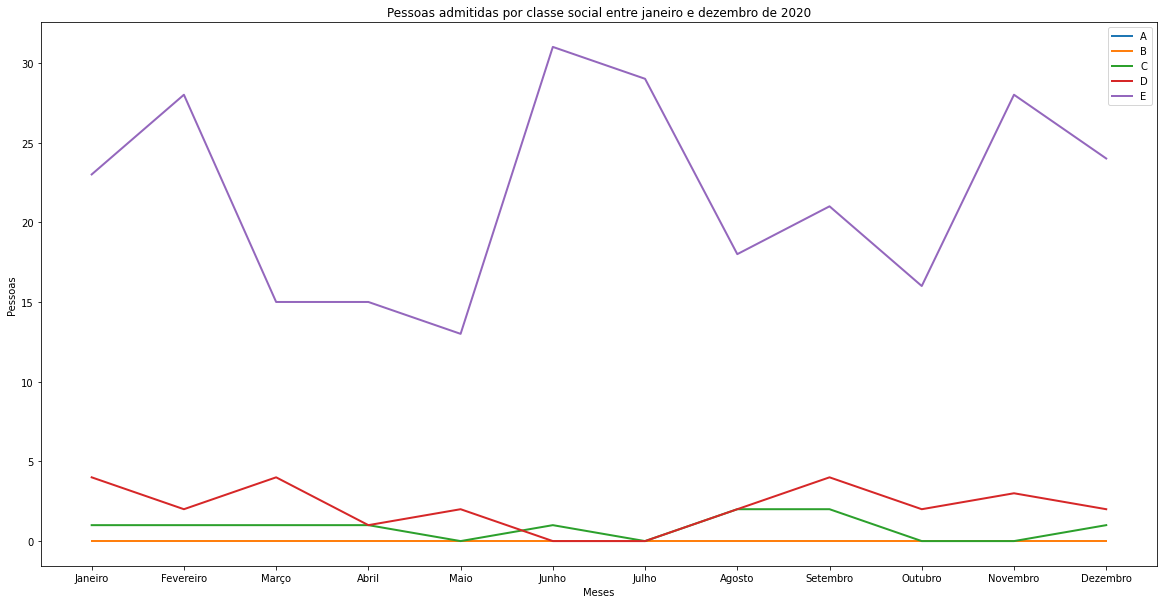

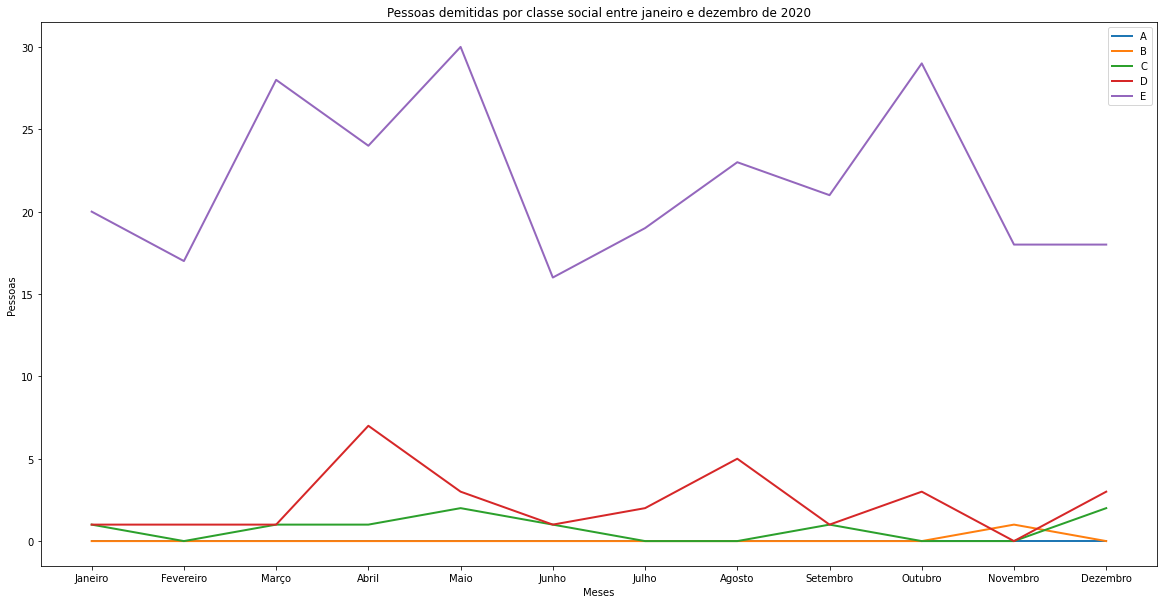

In [24]:
lista_A_admitidos2020 = []
lista_A_demitidos2020 = []
lista_B_admitidos2020 = []
lista_B_demitidos2020 = []
lista_C_admitidos2020 = []
lista_C_demitidos2020 = []
lista_D_admitidos2020 = []
lista_D_demitidos2020 = []
lista_E_admitidos2020 = []
lista_E_demitidos2020 = []
for mes,dic in empregoPorClasseSocial2020.items():
    lista_A_admitidos2020.append(dic['admitidos']['A'])
    lista_A_demitidos2020.append(dic['demitidos']['A'])
    lista_B_admitidos2020.append(dic['admitidos']['B'])
    lista_B_demitidos2020.append(dic['demitidos']['B'])
    lista_C_admitidos2020.append(dic['admitidos']['C'])
    lista_C_demitidos2020.append(dic['demitidos']['C'])
    lista_D_admitidos2020.append(dic['admitidos']['D'])
    lista_D_demitidos2020.append(dic['demitidos']['D'])
    lista_E_admitidos2020.append(dic['admitidos']['E'])
    lista_E_demitidos2020.append(dic['demitidos']['E'])

#gráfico das pessoas admitidas por classe social entre janeiro e dezembro de 2020
plotGraficoEmpregoClasseSocial(
    lista_A_admitidos2020,
    lista_B_admitidos2020,
    lista_C_admitidos2020,
    lista_D_admitidos2020,
    lista_E_admitidos2020,
    'Pessoas','Meses','Pessoas admitidas por classe social entre janeiro e dezembro de 2020',20,10,meses_grafico2020)
#gráfico das pessoas demitidas por classe social entre janeiro e dezembro de 2020
plotGraficoEmpregoClasseSocial(
    lista_A_demitidos2020,
    lista_B_demitidos2020,
    lista_C_demitidos2020,
    lista_D_demitidos2020,
    lista_E_demitidos2020,
    'Pessoas','Meses','Pessoas demitidas por classe social entre janeiro e dezembro de 2020',20,10,meses_grafico2020)

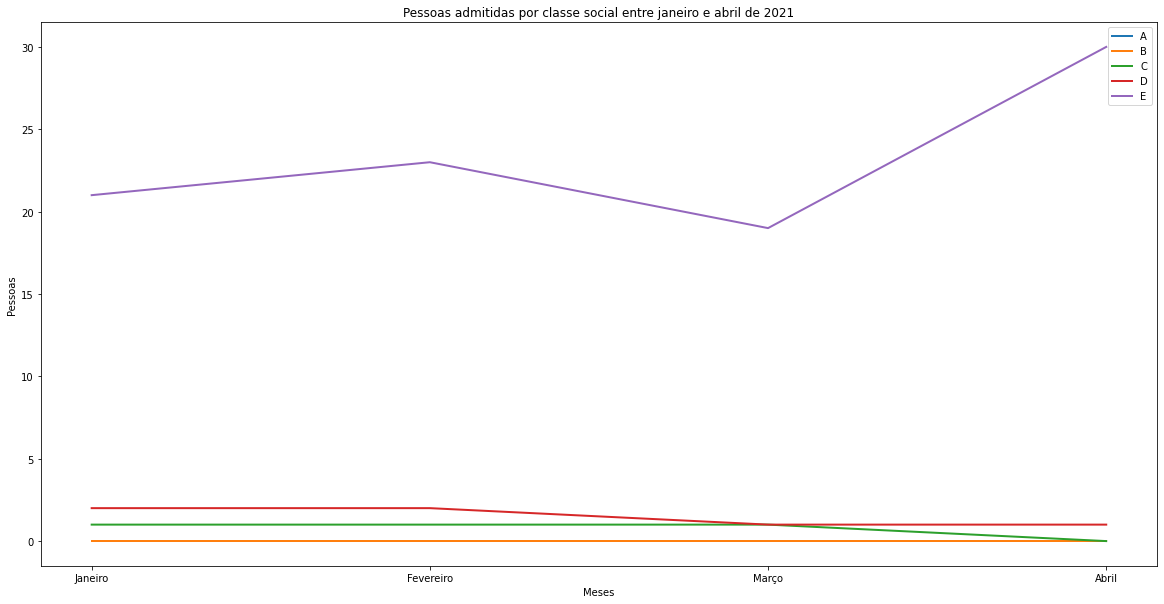

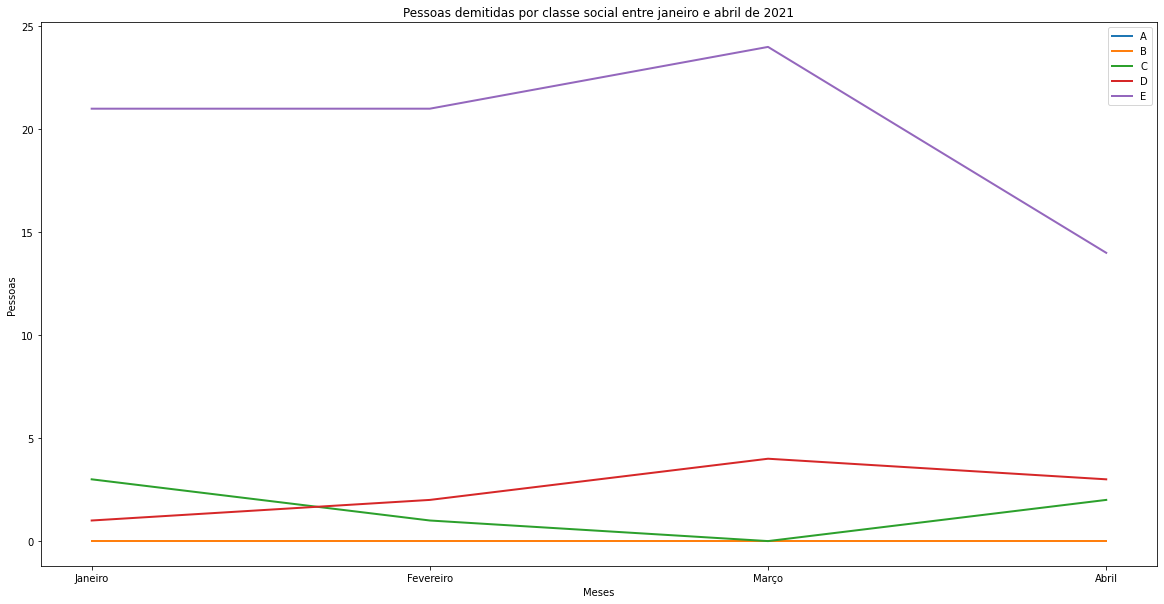

In [25]:
lista_A_admitidos2021 = []
lista_A_demitidos2021 = []
lista_B_admitidos2021 = []
lista_B_demitidos2021 = []
lista_C_admitidos2021 = []
lista_C_demitidos2021 = []
lista_D_admitidos2021 = []
lista_D_demitidos2021 = []
lista_E_admitidos2021 = []
lista_E_demitidos2021 = []
for mes,dic in empregoPorClasseSocial2021.items():
    lista_A_admitidos2021.append(dic['admitidos']['A'])
    lista_A_demitidos2021.append(dic['demitidos']['A'])
    lista_B_admitidos2021.append(dic['admitidos']['B'])
    lista_B_demitidos2021.append(dic['demitidos']['B'])
    lista_C_admitidos2021.append(dic['admitidos']['C'])
    lista_C_demitidos2021.append(dic['demitidos']['C'])
    lista_D_admitidos2021.append(dic['admitidos']['D'])
    lista_D_demitidos2021.append(dic['demitidos']['D'])
    lista_E_admitidos2021.append(dic['admitidos']['E'])
    lista_E_demitidos2021.append(dic['demitidos']['E'])
#gráfico das pessoas admitidas por classe social entre janeiro e abril de 2021
plotGraficoEmpregoClasseSocial(
    lista_A_admitidos2021,
    lista_B_admitidos2021,
    lista_C_admitidos2021,
    lista_D_admitidos2021,
    lista_E_admitidos2021,
    'Pessoas','Meses','Pessoas admitidas por classe social entre janeiro e abril de 2021',20,10,meses_grafico2021)
#gráfico das pessoas demitidas por classe social entre janeiro e abril de 2021
plotGraficoEmpregoClasseSocial(
    lista_A_demitidos2021,
    lista_B_demitidos2021,
    lista_C_demitidos2021,
    lista_D_demitidos2021,
    lista_E_demitidos2021,
    'Pessoas','Meses','Pessoas demitidas por classe social entre janeiro e abril de 2021',20,10,meses_grafico2021)

In [26]:
#Admissões e demissões por faixa etária 2020 
empregoPorFaixaEtaria2020 = {}
for mes in movimento2020:
    empregoPorFaixaEtaria2020[mes] = contagemPorFaixaEtaria(movimento2020[mes][['tipomovimentação','idade']].sample(50).to_dict('records'))
    
# admissões e demissões por faixa etária 2021
empregoPorFaixaEtaria2021 = {}
for mes in movimento2021:
    empregoPorFaixaEtaria2021[mes] = contagemPorFaixaEtaria(movimento2021[mes][['tipomovimentação', 'idade']].sample(50).to_dict('records'))

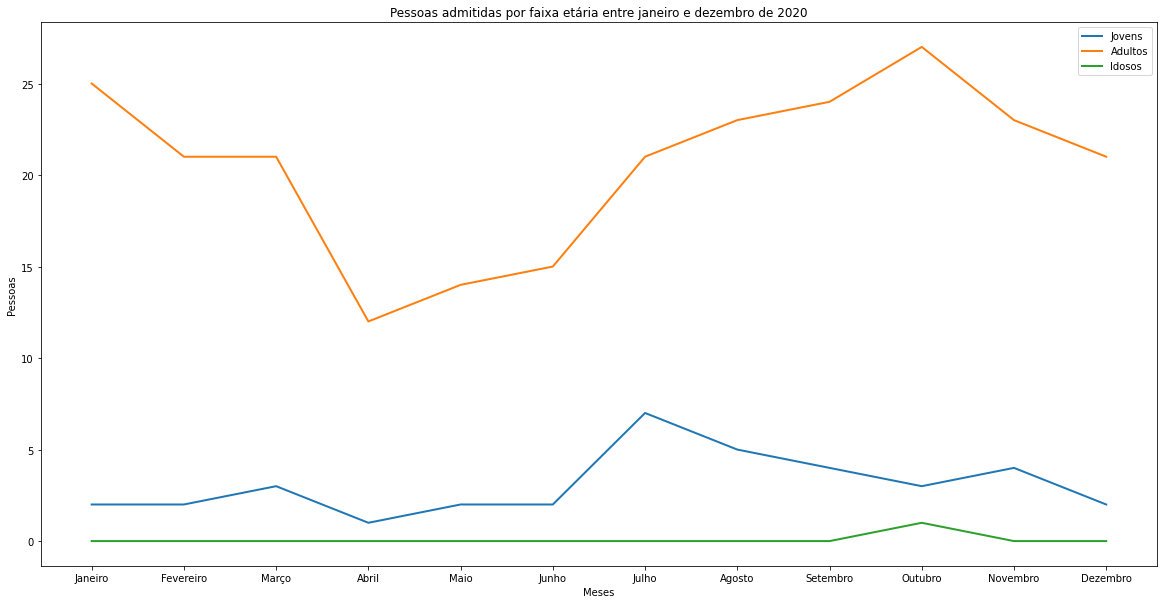

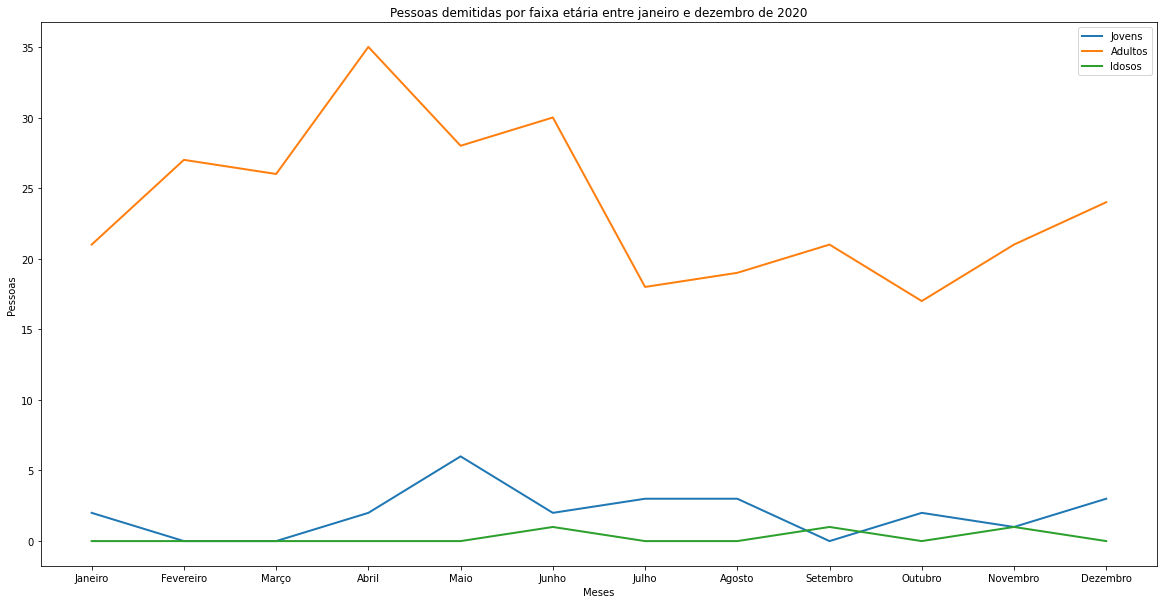

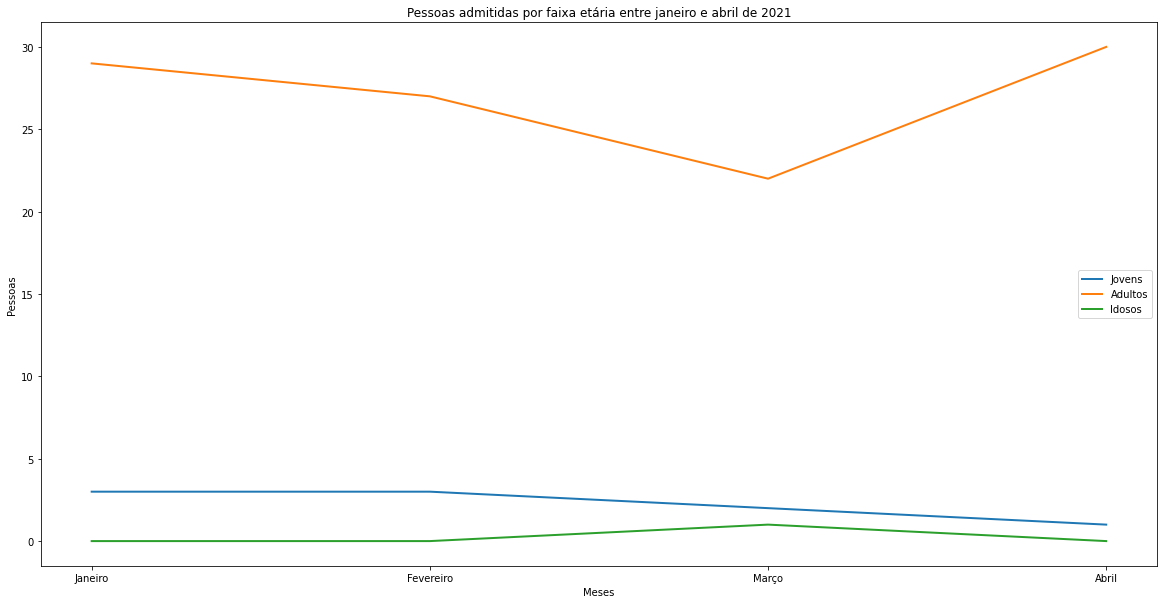

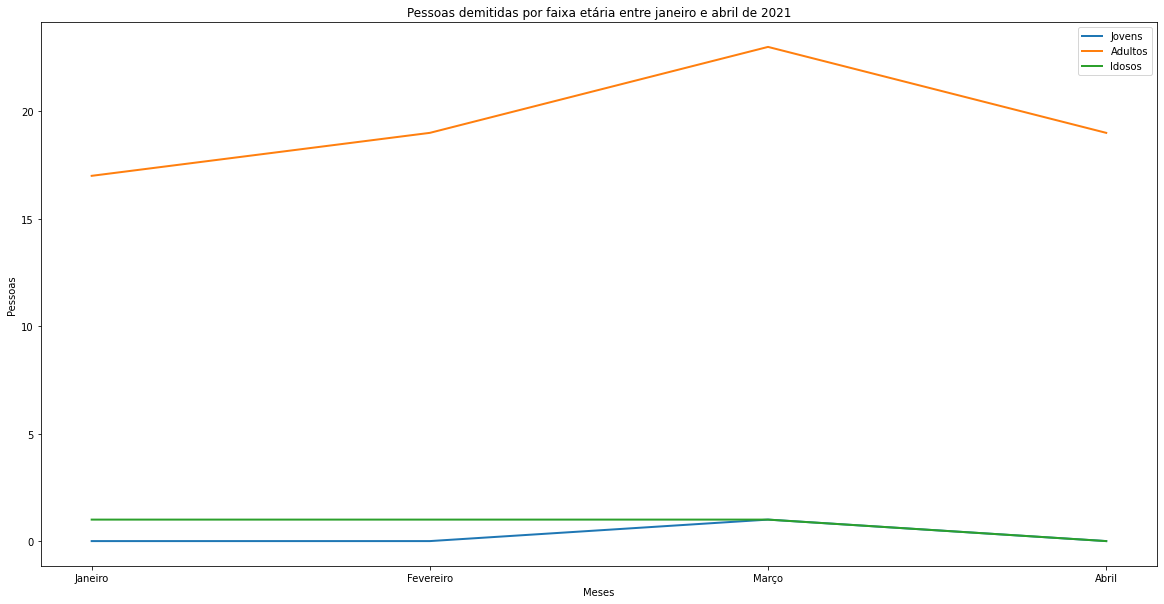

In [27]:
lista_Jovens_admitidos2020 = []
lista_Jovens_demitidos2020 = []
lista_Adultos_admitidos2020 = []
lista_Adultos_demitidos2020 = []
lista_Idosos_admitidos2020 = []
lista_Idosos_demitidos2020 = []

lista_Jovens_admitidos2021 = []
lista_Jovens_demitidos2021 = []
lista_Adultos_admitidos2021 = []
lista_Adultos_demitidos2021 = []
lista_Idosos_admitidos2021 = []
lista_Idosos_demitidos2021 = []

for mes,dic in empregoPorFaixaEtaria2020.items():
    lista_Jovens_admitidos2020.append(dic['admitidos']['Jovens'])
    lista_Jovens_demitidos2020.append(dic['demitidos']['Jovens'])
    lista_Adultos_admitidos2020.append(dic['admitidos']['Adultos'])
    lista_Adultos_demitidos2020.append(dic['demitidos']['Adultos'])
    lista_Idosos_admitidos2020.append(dic['admitidos']['Idosos'])
    lista_Idosos_demitidos2020.append(dic['demitidos']['Idosos'])
    
for mes,dic in empregoPorFaixaEtaria2021.items():
    lista_Jovens_admitidos2021.append(dic['admitidos']['Jovens'])
    lista_Jovens_demitidos2021.append(dic['demitidos']['Jovens'])
    lista_Adultos_admitidos2021.append(dic['admitidos']['Adultos'])
    lista_Adultos_demitidos2021.append(dic['demitidos']['Adultos'])
    lista_Idosos_admitidos2021.append(dic['admitidos']['Idosos'])
    lista_Idosos_demitidos2021.append(dic['demitidos']['Idosos'])

# grafico pessoas admitidos por faixa etaria em 2020
plotGraficoEmpregoFaixaEtaria(lista_Jovens_admitidos2020,lista_Adultos_admitidos2020,lista_Idosos_admitidos2020,'Pessoas','Meses','Pessoas admitidas por faixa etária entre janeiro e dezembro de 2020',20,10,meses_grafico2020)

# grafico pessoas admitidos por faixa etaria em 2020
plotGraficoEmpregoFaixaEtaria(lista_Jovens_demitidos2020,lista_Adultos_demitidos2020,lista_Idosos_demitidos2020,'Pessoas','Meses','Pessoas demitidas por faixa etária entre janeiro e dezembro de 2020',20,10,meses_grafico2020)

# grafico pessoas admitidos por faixa etaria em 2021
plotGraficoEmpregoFaixaEtaria(lista_Jovens_admitidos2021,lista_Adultos_admitidos2021,lista_Idosos_admitidos2021,'Pessoas','Meses','Pessoas admitidas por faixa etária entre janeiro e abril de 2021',20,10,meses_grafico2021)

# grafico pessoas demitidas por faixa etaria em 2021
plotGraficoEmpregoFaixaEtaria(lista_Jovens_demitidos2021,lista_Adultos_demitidos2021,lista_Idosos_demitidos2021,'Pessoas','Meses','Pessoas demitidas por faixa etária entre janeiro e abril de 2021',20,10,meses_grafico2021)

In [28]:
#*Dados consumo*
colunas = ["Unnamed: 1","Unnamed: 2", "Unnamed: 3", "Unnamed: 5", "Unnamed: 7", "Unnamed: 8"]
chaves = contasNacionais.loc[3, colunas]
valores = [contasNacionais.loc[100:104, colunas[0]],
           contasNacionais.loc[100:104, colunas[1]],
           contasNacionais.loc[100:104, colunas[2]],
           contasNacionais.loc[100:104, colunas[3]],
           contasNacionais.loc[100:104, colunas[4]],
           contasNacionais.loc[100:104, colunas[5]]
          ]
valores
#plotGraficoConsumoTrimestres(chaves, valores)

[100    124866
 101    127239
 102    105459
 103     82275
 104    208789
 Name: Unnamed: 1, dtype: object,
 100    313521
 101    302755
 102    354045
 103    344234
 104    348622
 Name: Unnamed: 2, dtype: object,
 100    1143671
 101    1103492
 102    1168093
 103    1271114
 104    1195943
 Name: Unnamed: 3, dtype: object,
 100    261805
 101    175275
 102    264138
 103    305877
 104    294668
 Name: Unnamed: 5, dtype: object,
 100    1184872
 101    1038340
 102    1167913
 103    1279785
 104    1232792
 Name: Unnamed: 7, dtype: object,
 100    349885
 101    377507
 102    371233
 103    427658
 104    359524
 Name: Unnamed: 8, dtype: object]

In [29]:
def plotGraficoConsumoTrimestres(chaves, valores):
    fig, ax = plt.subplots()

    # colocar barras
    
    fig.set_size_inches(14, 5)

    ax.set_title("Valores correntes das Contas Nacionais Trimestrais de 2020 a 2021")
    ax.set_xlabel("Setores e subsetores")
    ax.set_ylabel("Valores, em milhões de reais")
    ax.legend()
    plt.show()

In [30]:
#*Média salárial por raça*
Branca = {'salario':0 , 'quantidade':0, 'media':0}
Preta = {'salario':0 , 'quantidade':0, 'media':0}
Parda = {'salario':0 , 'quantidade':0, 'media':0}
Amarela = {'salario':0 , 'quantidade':0, 'media':0}
Indigena = {'salario':0 , 'quantidade':0, 'media':0}
Nao_informada = {'salario':0 , 'quantidade':0, 'media':0}
Nao_identificada = {'salario':0 , 'quantidade':0, 'media':0}
meses_grafico2020 = ['janeiro','fevereiro']#,'Março','Abril','Maio','Junho','Julho','Agosto','Setembro','Outubro','Novembro','Dezembro'
for mes in meses_grafico2020:
    for individuo in movimento2020[mes].sample(15000).iterrows():
        if Raca(int(individuo[1]['raçacor'])) == 'Branca':
            Branca["salario"] += individuo[1]['salário']
            Branca["quantidade"] += 1
        elif Raca(int(individuo[1]['raçacor'])) == 'Preta':
            Preta["salario"] += individuo[1]['salário']
            Preta["quantidade"] += 1
        elif Raca(int(individuo[1]['raçacor'])) == 'Parda':
            Parda["salario"] += individuo[1]['salário']
            Parda["quantidade"] += 1
        elif Raca(int(individuo[1]['raçacor'])) == 'Amarela':
            Amarela["salario"] += individuo[1]['salário']
            Amarela["quantidade"] += 1
        elif Raca(int(individuo[1]['raçacor'])) == 'Indígena':
            Indigena["salario"] += individuo[1]['salário']
            Indigena["quantidade"] += 1
        elif Raca(int(individuo[1]['raçacor'])) == 'Não informada':
            Nao_informada["salario"] += individuo[1]['salário']
            Nao_informada["quantidade"] += 1
        elif Raca(int(individuo[1]['raçacor'])) == 'Não identificada':
            Nao_identificada["salario"] += individuo[1]['salário']
            Nao_identificada["quantidade"] += 1
##Se por algum acaso der -Erro, divisão por 0-, tente rodar de novo para que tenha
Branca['media'] = Branca['salario']/Branca['quantidade']
Preta['media'] = Preta['salario']/Preta['quantidade']
Parda['media'] = Parda['salario']/Parda['quantidade']
Amarela['media'] = Amarela['salario']/Amarela['quantidade']
Indigena['media'] = Indigena['salario']/Indigena['quantidade']
Nao_informada['media'] = Nao_informada['salario']/Nao_informada['quantidade']
print(Branca)
print(Preta)
print(Parda)
print(Amarela)
print(Indigena)
print(Nao_informada)

{'salario': 39156483.707231365, 'quantidade': 12704, 'media': 3082.2169165012097}
{'salario': 3956831.7809619904, 'quantidade': 1699, 'media': 2328.9180582471986}
{'salario': 20355260.036563653, 'quantidade': 10047, 'media': 2026.0037858628102}
{'salario': 329600.1710662842, 'quantidade': 159, 'media': 2072.957050731347}
{'salario': 116406.8394870758, 'quantidade': 67, 'media': 1737.4155147324748}
{'salario': 10888704.010736136, 'quantidade': 5150, 'media': 2114.311458395366}


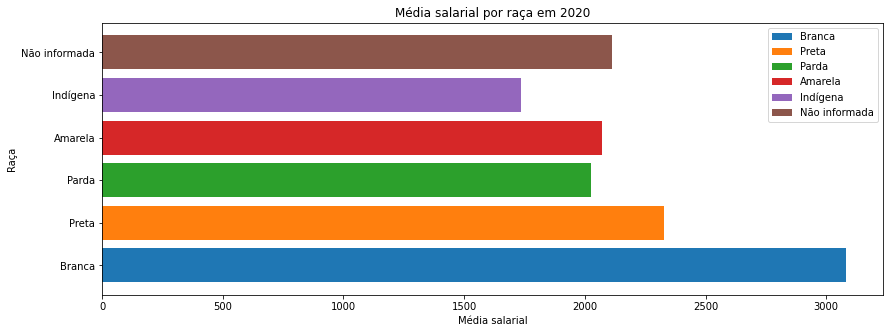

In [31]:
    fig, ax = plt.subplots()

    ax.barh("Branca",Branca['media'], align='center', label="Branca")
    ax.barh("Preta",Preta['media'], align='center', label="Preta")
    ax.barh("Parda",Parda['media'], align='center', label="Parda")
    ax.barh("Amarela",Amarela['media'], align='center', label="Amarela")
    ax.barh("Indígena",Indigena['media'], align='center', label="Indígena")
    ax.barh("Não informada",Nao_informada['media'], align='center', label="Não informada")
    fig.set_size_inches(14, 5)

    ax.set_title("Média salarial por raça em 2020")
    ax.set_xlabel("Média salarial")
    ax.set_ylabel("Raça")
    ax.legend()
    plt.show()

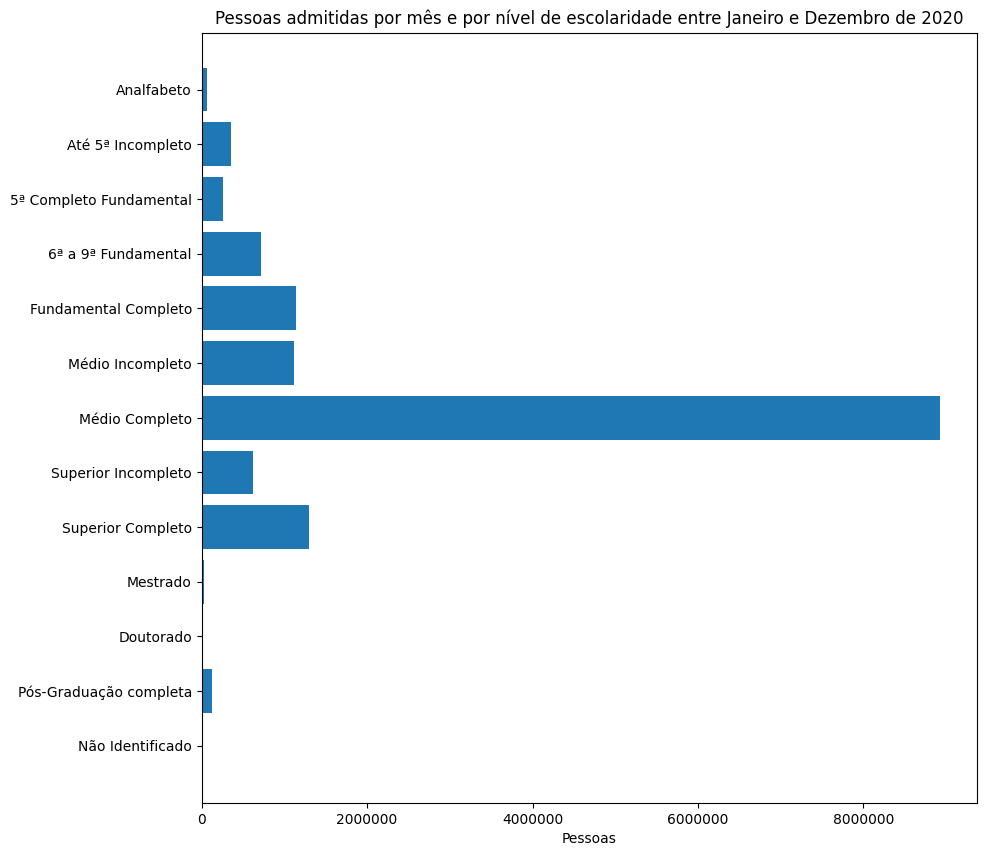

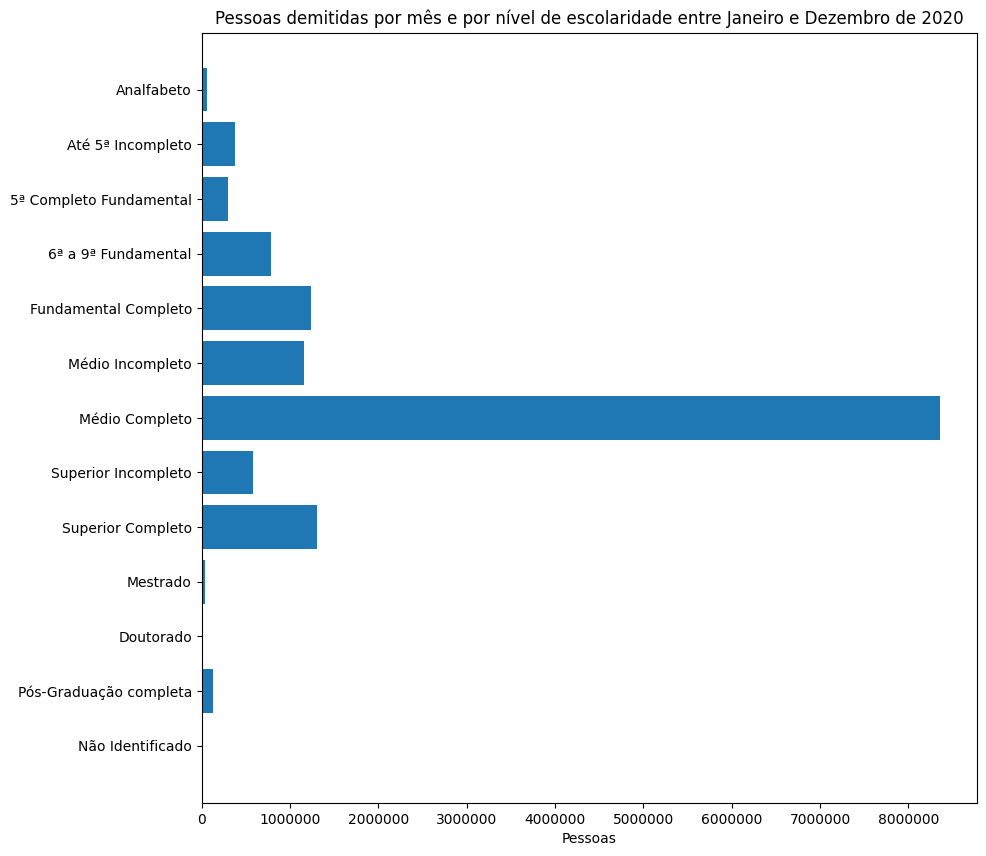

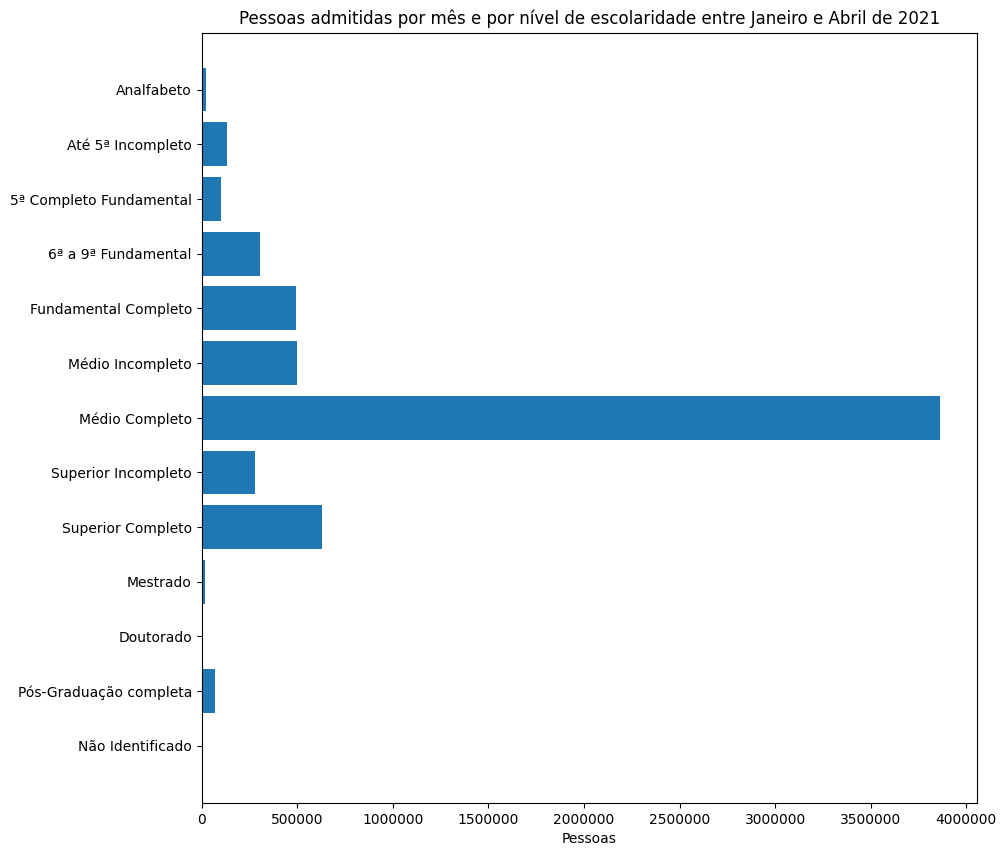

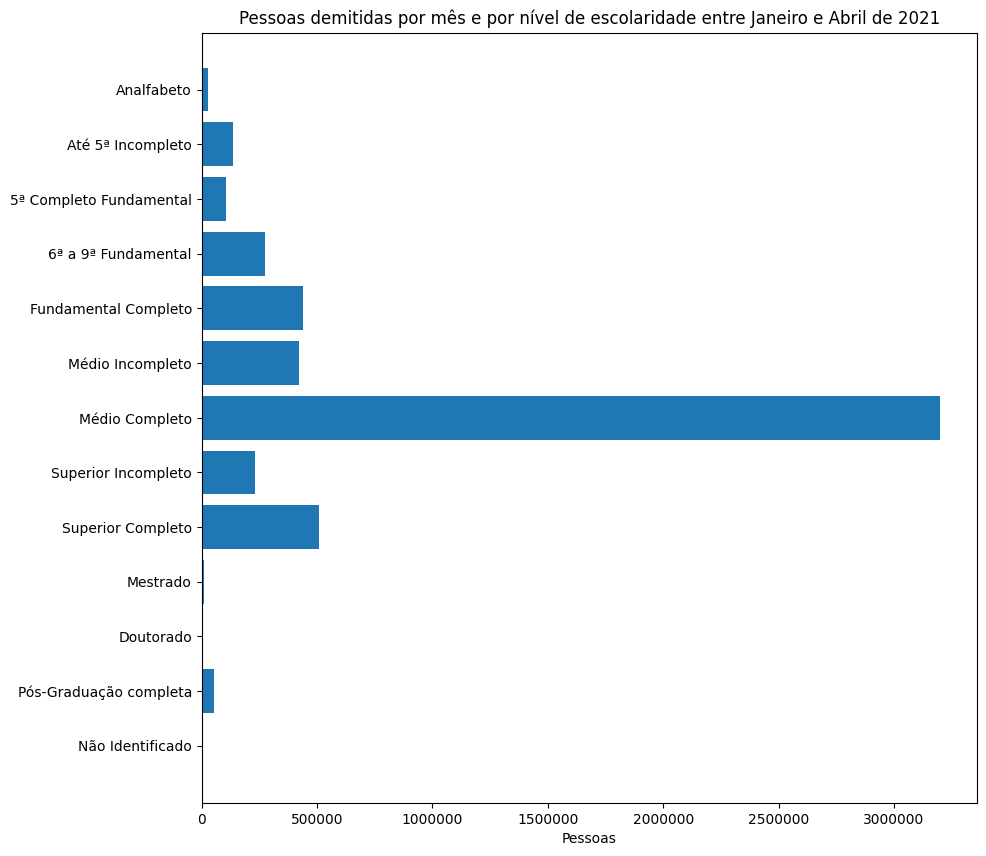

In [32]:
grau_instrucao = {'1': 'Analfabeto','2': 'Até 5ª Incompleto','3': '5ª Completo Fundamental','4': '6ª a 9ª Fundamental','5': 'Fundamental Completo','6': 'Médio Incompleto','7': 'Médio Completo','8': 'Superior Incompleto','9': 'Superior Completo','10': 'Mestrado','11': 'Doutorado','80': 'Pós-Graduação completa','99': 'Não Identificado','13': 'Não Identificado','12': 'Não Identificado'}

def contagemEmpregoPorInstrucao(dic):
    admitidos = {}
    demitidos = {}
    for k,v in dic.items():
        chave = grau_instrucao[str(k[1])]
        if(movimento(k[0])=='admitido'):
            if chave in admitidos:
                admitidos[chave] += v
            else:
                admitidos[chave] = v
        if(movimento(k[0])=='demitido'):
            if chave in demitidos:
                demitidos[chave] += v
            else:
                demitidos[chave] = v
    return {
        'admitidos':admitidos,
        'demitidos':demitidos
    }
    
def plotGraficoEmpregoInstrucao(lista,ylabel,xlabel,title,tamanhox,tamanhoy,meses,tipo):
    
    pessoas = {}
    for k,instrucao in grau_instrucao.items():
        pessoas[instrucao] = 0
    for mes,dic in enumerate(lista):
        for instrucao, qtd_pessoas in dic[tipo].items():
            pessoas[instrucao]+=qtd_pessoas
            
    barWidth = 0.25
    plt.rcdefaults()
    fig, ax = plt.subplots()
    y_pos = np.arange(len(pessoas.keys()))
    grafico = []
    for instrucao,qtd_pessoas in pessoas.items():
        grafico.append(qtd_pessoas)
    ax.barh(y_pos,grafico, align='center')
    ax.set_yticks(y_pos)
    ax.set_yticklabels(pessoas.keys())
    ax.invert_yaxis() 
    ax.set_xlabel(xlabel)
    ax.set_title(title)
    fig.set_size_inches(tamanhox, tamanhoy)
    plt.ticklabel_format(style='plain', axis='x')

    plt.show()
empregoPorNivelInstrucao2020 = []
empregoPorNivelInstrucao2021 = []

for mes in movimento2020:
    empregoPorNivelInstrucao2020.append(contagemEmpregoPorInstrucao(movimento2020[mes].groupby(['tipomovimentação'])['graudeinstrução'].value_counts().to_dict()))
for mes in movimento2021:
    empregoPorNivelInstrucao2021.append(contagemEmpregoPorInstrucao(movimento2021[mes].groupby(['tipomovimentação'])['graudeinstrução'].value_counts().to_dict()))
plotGraficoEmpregoInstrucao(empregoPorNivelInstrucao2020,'Grau de instrução','Pessoas','Pessoas admitidas por mês e por nível de escolaridade entre Janeiro e Dezembro de 2020',10,10,meses_grafico2020,'admitidos')
plotGraficoEmpregoInstrucao(empregoPorNivelInstrucao2020,'Grau de instrução','Pessoas','Pessoas demitidas por mês e por nível de escolaridade entre Janeiro e Dezembro de 2020',10,10,meses_grafico2020,'demitidos')

plotGraficoEmpregoInstrucao(empregoPorNivelInstrucao2021,'Grau de instrução','Pessoas','Pessoas admitidas por mês e por nível de escolaridade entre Janeiro e Abril de 2021',10,10,meses_grafico2021,'admitidos')
plotGraficoEmpregoInstrucao(empregoPorNivelInstrucao2021,'Grau de instrução','Pessoas','Pessoas demitidas por mês e por nível de escolaridade entre Janeiro e Abril de 2021',10,10,meses_grafico2021,'demitidos')


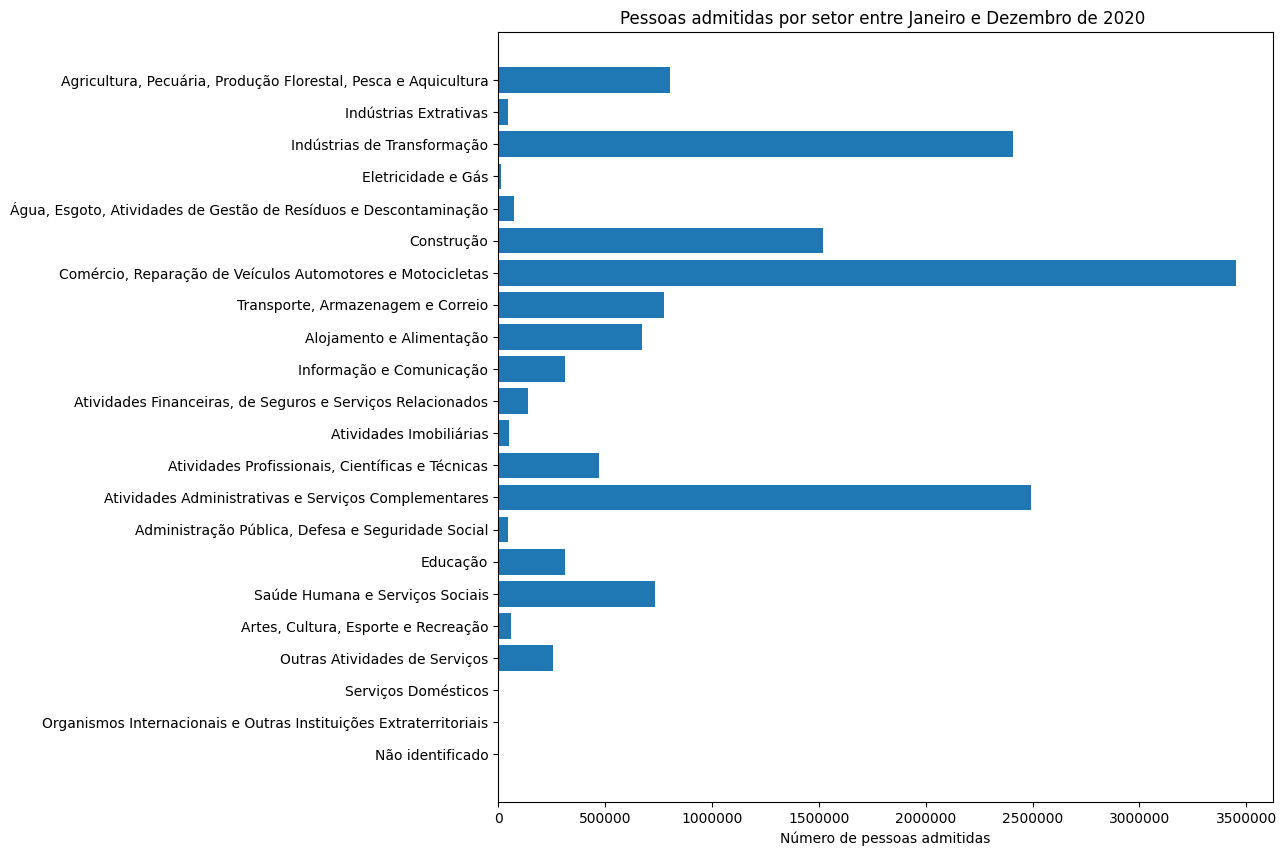

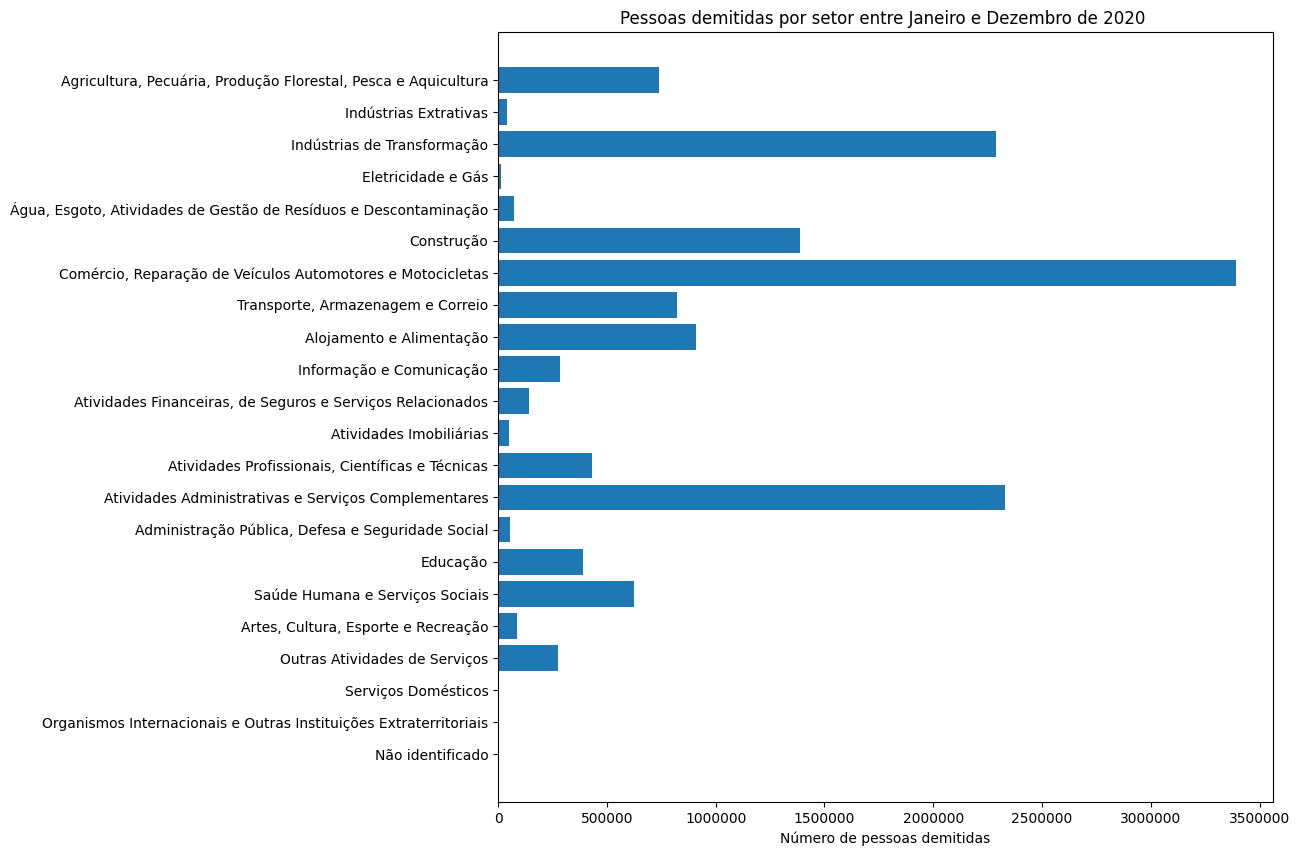

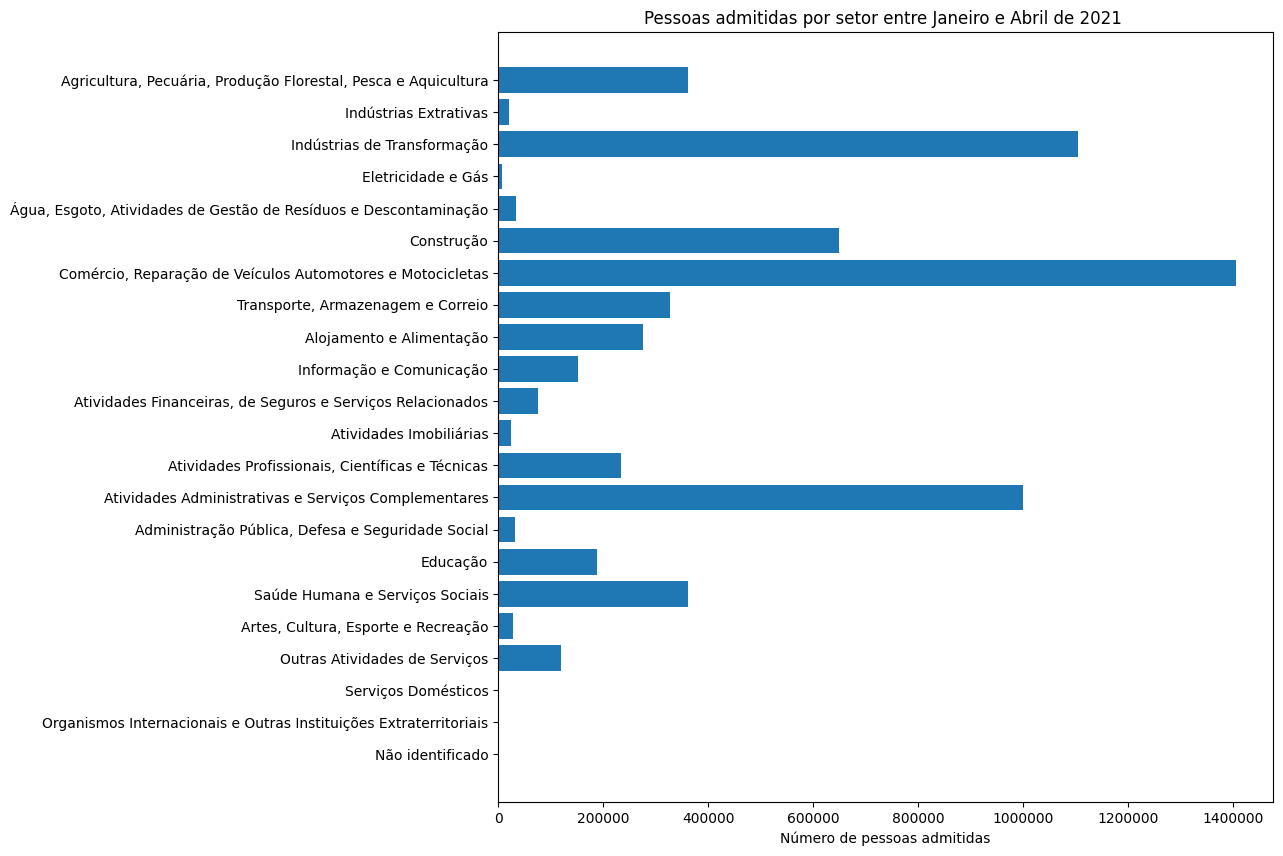

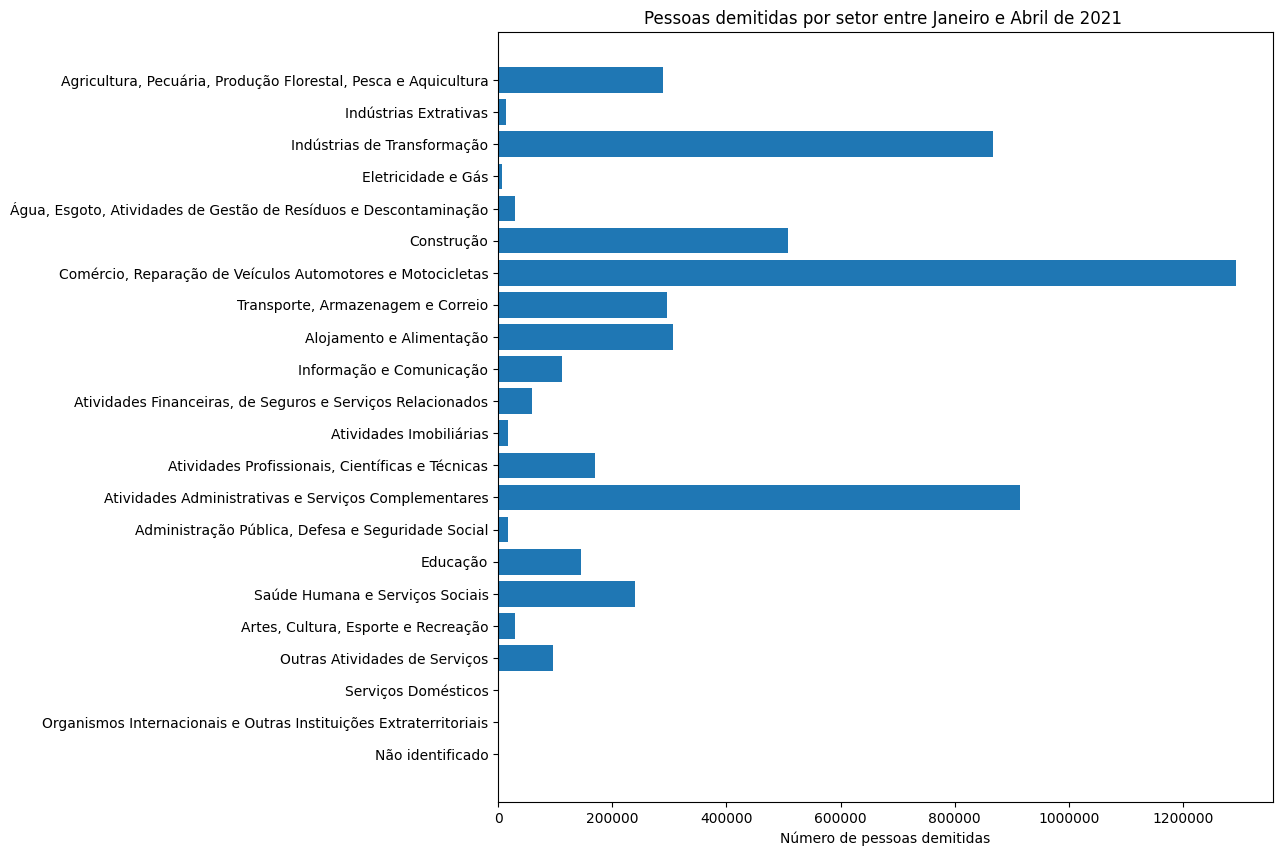

In [33]:
def plotGraficoSecao(lista,xlabel,title,tamanhox,tamanhoy,secoes):
    pessoas = {}
    for s in secoes:
        pessoas[s] = 0
    for l in lista:
        for secao,qtd_pessoas in l.items():
            pessoas[secao]+=qtd_pessoas
            
    plt.rcdefaults()
    fig, ax = plt.subplots()
    y_pos = np.arange(len(pessoas.keys()))
    grafico = []
    for secao,qtd_pessoas in pessoas.items():
        grafico.append(qtd_pessoas)
    ax.barh(y_pos,grafico, align='center')
    ax.set_yticks(y_pos)
    ax.set_yticklabels(pessoas.keys())
    ax.invert_yaxis() 
    ax.set_xlabel(xlabel)
    ax.set_title(title)
    fig.set_size_inches(tamanhox, tamanhoy)
    plt.ticklabel_format(style='plain', axis='x')

    plt.show()

pessoasAdmitidasSetor2020 = []
pessoasDemitidasSetor2020 = []

pessoasAdmitidasSetor2021 = []
pessoasDemitidasSetor2021 = []

for mes in movimento2020:
    pessoasAdmitidasSetor2020.append(movimento2020[mes].replace(sec_antigas, sec_novas).loc[movimento2020[mes]['tipomovimentação'].isin(cod_admitidos)]['seção'].value_counts().to_dict())
    pessoasDemitidasSetor2020.append(movimento2020[mes].replace(sec_antigas, sec_novas).loc[movimento2020[mes]['tipomovimentação'].isin(cod_demitidos)]['seção'].value_counts().to_dict())

for mes in movimento2021:
    pessoasAdmitidasSetor2021.append(movimento2021[mes].replace(sec_antigas, sec_novas).loc[movimento2021[mes]['tipomovimentação'].isin(cod_admitidos)]['seção'].value_counts().to_dict())
    pessoasDemitidasSetor2021.append(movimento2021[mes].replace(sec_antigas, sec_novas).loc[movimento2021[mes]['tipomovimentação'].isin(cod_demitidos)]['seção'].value_counts().to_dict())

plotGraficoSecao(pessoasAdmitidasSetor2020,'Número de pessoas admitidas','Pessoas admitidas por setor entre Janeiro e Dezembro de 2020 ',10,10,sec_novas)
plotGraficoSecao(pessoasDemitidasSetor2020,'Número de pessoas demitidas','Pessoas demitidas por setor entre Janeiro e Dezembro de 2020 ',10,10,sec_novas)
plotGraficoSecao(pessoasAdmitidasSetor2021,'Número de pessoas admitidas','Pessoas admitidas por setor entre Janeiro e Abril de 2021 ',10,10,sec_novas)
plotGraficoSecao(pessoasDemitidasSetor2021,'Número de pessoas demitidas','Pessoas demitidas por setor entre Janeiro e Abril de 2021 ',10,10,sec_novas)

In [34]:
Homem = {'quant_admit':0 , 'salar_admit':0, 'quant_demit':0, 'salar_demit':0, 'media_admit':0, 'media_demit':0}
Mulher = {'quant_admit':0 , 'salar_admit':0, 'quant_demit':0, 'salar_demit':0, 'media_admit':0, 'media_demit':0}

meses_grafico2020 = ['janeiro','fevereiro']#,'Março','Abril','Maio','Junho','Julho','Agosto','Setembro','Outubro','Novembro','Dezembro'
for mes in meses_grafico2020:
    for individuo in movimento2020[mes].sample(30000).iterrows():
        if individuo[1]['sexo'] == 1:
            if individuo[1]['tipomovimentação'] in cod_admitidos:
                Homem["quant_admit"] += 1
                Homem["salar_admit"] += individuo[1]['salário']
            elif individuo[1]['tipomovimentação'] in cod_demitidos:
                Homem["quant_demit"] += 1
                Homem["salar_demit"] += individuo[1]['salário']
        if individuo[1]['sexo'] == 3:
            if individuo[1]['tipomovimentação'] in cod_admitidos:
                Mulher["quant_admit"] += 1
                Mulher["salar_admit"] += individuo[1]['salário']
            elif individuo[1]['tipomovimentação'] in cod_demitidos:
                Mulher["quant_demit"] += 1
                Mulher["salar_demit"] += individuo[1]['salário']
       
Homem['media_admit'] = Homem['salar_admit']/Homem['quant_admit']
Homem['media_demit'] = Homem['salar_demit']/Homem['quant_demit']
Mulher['media_admit'] = Mulher['salar_admit']/Mulher['quant_admit']
Mulher['media_demit'] = Mulher['salar_demit']/Mulher['quant_demit']

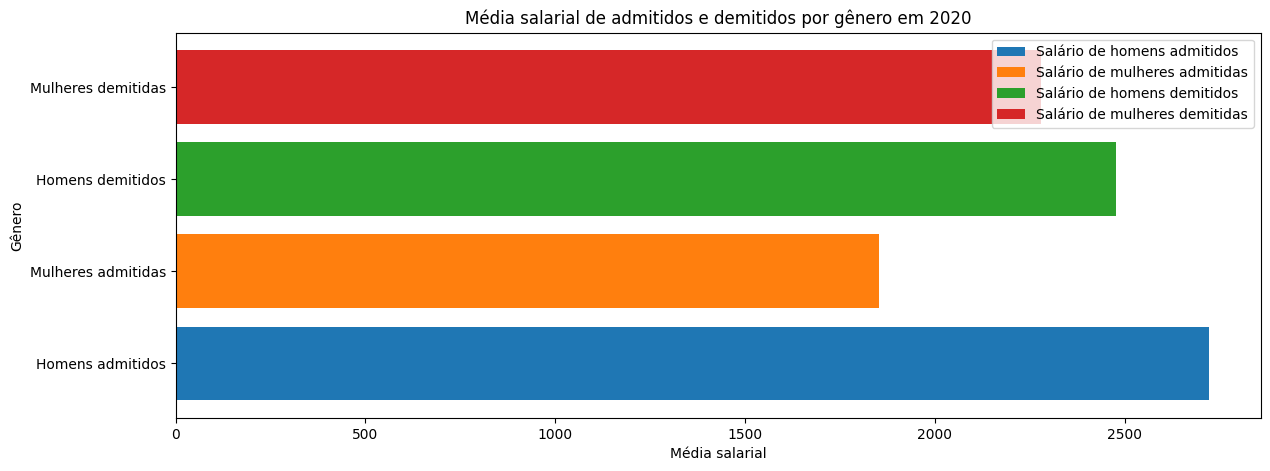

In [35]:
    fig, ax = plt.subplots()

    ax.barh("Homens admitidos", Homem['media_admit'], align='center', label="Salário de homens admitidos")
    ax.barh("Mulheres admitidas", Mulher['media_admit'], align='center', label="Salário de mulheres admitidas")
    ax.barh("Homens demitidos", Homem['media_demit'], align='center', label="Salário de homens demitidos")
    ax.barh("Mulheres demitidas", Mulher['media_demit'], align='center', label="Salário de mulheres demitidas")
    fig.set_size_inches(14, 5)

    ax.set_title("Média salarial de admitidos e demitidos por gênero em 2020")
    ax.set_xlabel("Média salarial")
    ax.set_ylabel("Gênero")
    ax.legend()
    plt.show()

In [36]:
#Função para saber qual o tipo de desligamento da pessoa
cod_desligamentos = {31: "Desligamento por demissão sem justa causa",
                     32: "Desligamento por demissão com justa causa",
                     33: "Culpa Recíproca",
                     40: "Desligamento a pedido",
                     43: "Término contrato trabalho prazo determinado",
                     45: "Desligamento por Término de contrato",
                     50: "Desligamento por aposentadoria",
                     60: "Desligamento por morte",
                     80: "Desligamento por transferência",
                     90: "Desligamento por Acordo entre empregado e empregador",
                     98: "Desligamento de Tipo Ignorado",
                     99: "Não Identificado"}

def contagemDesligamentoSexo(dic):
    mes = {'mulheres': {
                'Desligamento por demissão sem justa causa':0,
                'Desligamento por demissão com justa causa':0,
                'Culpa Recíproca':0,
                'Desligamento a pedido':0,
                'Término contrato trabalho prazo determinado':0,
                'Desligamento por Término de contrato':0,
                'Desligamento por aposentadoria':0,
                'Desligamento por morte':0,
                'Desligamento por transferência':0,
                'Desligamento por Acordo entre empregado e empregador':0,
                'Desligamento de Tipo Ignorado':0,
                'Não Identificado':0},
           'homens': {
                'Desligamento por demissão sem justa causa':0,
                'Desligamento por demissão com justa causa':0,
                'Culpa Recíproca':0,
                'Desligamento a pedido':0,
                'Término contrato trabalho prazo determinado':0,
                'Desligamento por Término de contrato':0,
                'Desligamento por aposentadoria':0,
                'Desligamento por morte':0,
                'Desligamento por transferência':0,
                'Desligamento por Acordo entre empregado e empregador':0,
                'Desligamento de Tipo Ignorado':0,
                'Não Identificado':0}
            }
    
    for k, v in dic.items():
        if (k[0] in cod_desligamentos.keys()):
            tipodesligamento = cod_desligamentos[k[0]]
            if(k[1]==1):
                mes['homens'][tipodesligamento] += v 
            if(k[1]==3):
                mes['mulheres'][tipodesligamento] += v 
    
    return mes


desligamentosPorGenero2020 = {}

for mes in movimento2020:
    desligamentosPorGenero2020[mes] = contagemDesligamentoSexo(movimento2020[mes].sample(50).groupby(['tipomovimentação'])['sexo'].value_counts().to_dict())

print(desligamentosPorGenero2020)

{'janeiro': {'mulheres': {'Desligamento por demissão sem justa causa': 3, 'Desligamento por demissão com justa causa': 0, 'Culpa Recíproca': 0, 'Desligamento a pedido': 2, 'Término contrato trabalho prazo determinado': 1, 'Desligamento por Término de contrato': 0, 'Desligamento por aposentadoria': 0, 'Desligamento por morte': 0, 'Desligamento por transferência': 0, 'Desligamento por Acordo entre empregado e empregador': 0, 'Desligamento de Tipo Ignorado': 0, 'Não Identificado': 0}, 'homens': {'Desligamento por demissão sem justa causa': 10, 'Desligamento por demissão com justa causa': 1, 'Culpa Recíproca': 0, 'Desligamento a pedido': 4, 'Término contrato trabalho prazo determinado': 3, 'Desligamento por Término de contrato': 2, 'Desligamento por aposentadoria': 0, 'Desligamento por morte': 0, 'Desligamento por transferência': 0, 'Desligamento por Acordo entre empregado e empregador': 0, 'Desligamento de Tipo Ignorado': 0, 'Não Identificado': 0}}, 'fevereiro': {'mulheres': {'Desligament